### Global Health Data

This project uses the *Global Health, Nutrition, Mortality, Economic Data* obtained from Kaggle.

- Author: Miguel Roca
- Source: Kaggle
- License: Creative Commons Attribution–NonCommercial–ShareAlike 4.0 (CC BY-NC-SA 4.0)
- Modifications: Data cleaning, feature engineering, and aggregation were performed.

This dataset is used for non-commercial, educational purposes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pycountry_convert as pc
import os
from plotly.offline import plot


In [2]:
global_data = pd.read_csv("C:/Users/xingz/Downloads/Project/UnifiedDataset.csv")

In [3]:
type(global_data)

pandas.core.frame.DataFrame

In [4]:
global_data.head()

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


In [5]:
global_data.shape

(22050, 150)

In [ ]:
global_data.describe()

# Saving to html
html_path = "../global_health/web/assets/tables/describe.html"

global_data.describe().to_html(
    html_path,
    classes = "table table-sm table-hover table-striped",
    border = 0,
    float_format = "%.2f"
)

In [7]:
# Renaming a column for spelling consistency
global_data = global_data.rename(columns={"Universal Heath Care Coverage": "Universal Health Care Coverage"})

Feature Engineering

In [8]:
# Combining plant protein and animal protein into a protein column
global_data["Diet Calories Protein"] = global_data["Diet Calories Plant Protein"] + global_data["Diet Calories Animal Protein"]

In [9]:
# Adding a Continent Column
def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None   # if country not recognized

global_data["Region"] = global_data["Country"].apply(country_to_continent)

In [44]:
# Missingness for each column

missing_pct = global_data.isna().mean() * 100
print(missing_pct)

missing_html_path = "../global_health/web/assets/tables/missingness.html"
missing_pct.to_frame(name="Missing Percentage").to_html(
    missing_html_path,
    classes = "table table-sm table-hover table-striped",
    border = 0,
    float_format = "%.2f"
)

Country                         0.000000
Year                            0.000000
Gender                          0.000000
Life Expectancy                 0.000000
Infant Mortality Rate          34.435374
                                 ...    
Diet Calories Plant Protein    45.224490
Diet Calories Fat              45.224490
Diet Calories Carbohydrates    45.224490
Diet Calories Protein          45.224490
Region                         17.414966
Length: 152, dtype: float64


In [48]:
# Calculate missingness percentage
missing_pct = global_data.isna().mean() * 100

# Identify columns to drop
cols_to_drop = missing_pct[missing_pct > 50].index

# Drop them
data = global_data.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns:")
print(list(cols_to_drop))
print(f"New shape: {data.shape}")

Dropped 90 columns:
['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular', 'Suicides Rate', 'Alcohol Abuse', 'Air Pollution Death Rate Stroke', 'Low CI Value Air Pollution Death Rate Stroke', 'High CI Value Air Pollution Death Rate Stroke', 'Air Pollution Death Rate Stroke Age Standarized', 'Low CI Value Air Pollution Death Rate Stroke Age Standarized', 'High CI Value Air Pollution Death Rate Stroke Age Standarized', 'Air Pollution Death Rate Ischaemic Heart Disease', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease', 'Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized', 'Air Pollution Death Rate Lower Respiratory Infections', 'Low CI Value Air Pollution Death Rate Lower Respiratory 

In [ ]:
data.columns.tolist()


# Creating a table of kept columns and their missingness
missingness_after = data.isna().mean() * 100

kept_after_html_path = "../global_health/web/assets/tables/kept_columns.html"
missingness_after.to_frame(name = "Missing Percentage").to_html(
    kept_after_html_path,
    classes = "table table-sm table-hover table-striped text-center",
    border = 0,
    float_format = "%.2f"
)

In [65]:
# Standardizing Rate Columns

cols_to_standardize = [
    "Infant Mortality Rate",
    "Under 5 Mortality Rate",
    "% Population Aged 0-14",
    "% Population Aged 15-64",
    "% Population Aged 65+",
    "% Population Aged 65-69",
    "% Population Aged 70-74",
    "% Population Aged 75-79",
    "% Population Aged 80+",
    "Neonatal Mortality Rate",
    "Birth Rate",
    "Death Rate",
    "Homicide Rate",
    "GDP per Capita",
    "GNI per Capita",
    "Income per Capita",
    "Total Population",
    "Government Expenditure Health",
    "Government Expenditure Military"
]

for item in cols_to_standardize:
    data[item] = (data[item]-data[item].mean())/data[item].std()

In [ ]:
fig = px.histogram(data, x = "Infant Mortality Rate",
                   nbins = 50,
                   title = "Standardized Distribution of Infant Mortality Rate")
fig.show()

# Save the interactive HTML
html_path = "../global_health/web/assets/img/plots/z_imr_histogram.html"
os.makedirs(os.path.dirname(html_path), exist_ok=True)
plot(fig, filename = html_path, auto_open=False)

'../global_health/web/assets/img/plots/z_imr_histogram.html'

In [14]:
# Finding macronutrient ratios

data["Total Calories"] = data["Diet Calories Animal Protein"] + data["Diet Calories Plant Protein"]
+ data["Diet Calories Fat"] + data["Diet Calories Carbohydrates"]

data["Protein Ratio"] = (data["Diet Calories Animal Protein"] + data["Diet Calories Plant Protein"]) / data["Total Calories"]

data["Fat Ratio"] = data["Diet Calories Fat"] / data["Total Calories"]

data["Carb Ratio"] = data["Diet Calories Carbohydrates"] / data["Total Calories"]

# Standardizing macronutrient ratios
data["Protein Ratio"] = (data["Protein Ratio"] - data["Protein Ratio"].mean()) / data["Protein Ratio"].std()
data["Fat Ratio"] = (data["Fat Ratio"] - data["Fat Ratio"].mean()) / data["Fat Ratio"].std()
data["Carb Ratio"] = (data["Carb Ratio"] - data["Carb Ratio"].mean()) / data["Carb Ratio"].std()


In [15]:
summary_GNI = global_data['GNI per Capita'].describe()
print(summary_GNI)

count     15305.000000
mean       9941.441118
std       15386.905358
min         110.000000
25%         910.000000
50%        3210.000000
75%       11810.000000
max      121890.000000
Name: GNI per Capita, dtype: float64


Data Visualization

In [ ]:
fig = px.scatter(
    global_data,
    x = "Infant Mortality Rate",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "Infant Mortality Rate": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "Infant Mortality Rate"
)

fig.show()

# Save the interactive HTML
html_path = "../global_health/web/assets/img/plots/imr_scatter.html"
plot(fig, filename=html_path, auto_open=False)


'../global_health/web/assets/img/plots/imr_scatter.html'

In [ ]:
fig = px.scatter(
    global_data,
    x = "Death Rate",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "Death Rate": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "Birth Rate"
)

fig.show()


# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/death_birth_scatter.html"
png_path = "../global_health/web/assets/img/plots/death_birth_scatter.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

In [ ]:
fig = px.scatter(
    global_data,
    x = "Government Expenditure Health",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "Government Expenditure Health": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "Government Expenditure Health"
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/gov_exp_scatter.html"
png_path = "../global_health/web/assets/img/plots/gov_exp_scatter.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

In [ ]:
fig = px.scatter(
    global_data,
    x = "Universal Health Care Coverage",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "Universal Health Care Coverage": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "Universal Health Care Coverage"
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/universal_care_scatter.html"
png_path = "../global_health/web/assets/img/plots/universal_care_scatter.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

In [ ]:
global_data_2019 = (global_data.query("Year == 2019").query("Country != 'World'").dropna(subset=["GNI per Capita", "Life Expectancy", "Total Population"]))

fig = px.scatter(
    global_data_2019,
    x = "GNI per Capita",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "GNI per Capita": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "% Population Aged 65+"
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/gni_scatter.html"
png_path = "../global_health/web/assets/img/plots/gni_scatter.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

In [ ]:

fig = px.scatter(
    global_data,
    x = "Diet Calories Protein",
    y = "Life Expectancy",
    hover_name = "Country",
    hover_data={
        "Diet Calories Carbohydrates": True,
        "Life Expectancy": True,
        "Year" : True
    },
    color = "Diet Calories Fat"

)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/diet_scatter.html"
png_path = "../global_health/web/assets/img/plots/diet_scatter.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

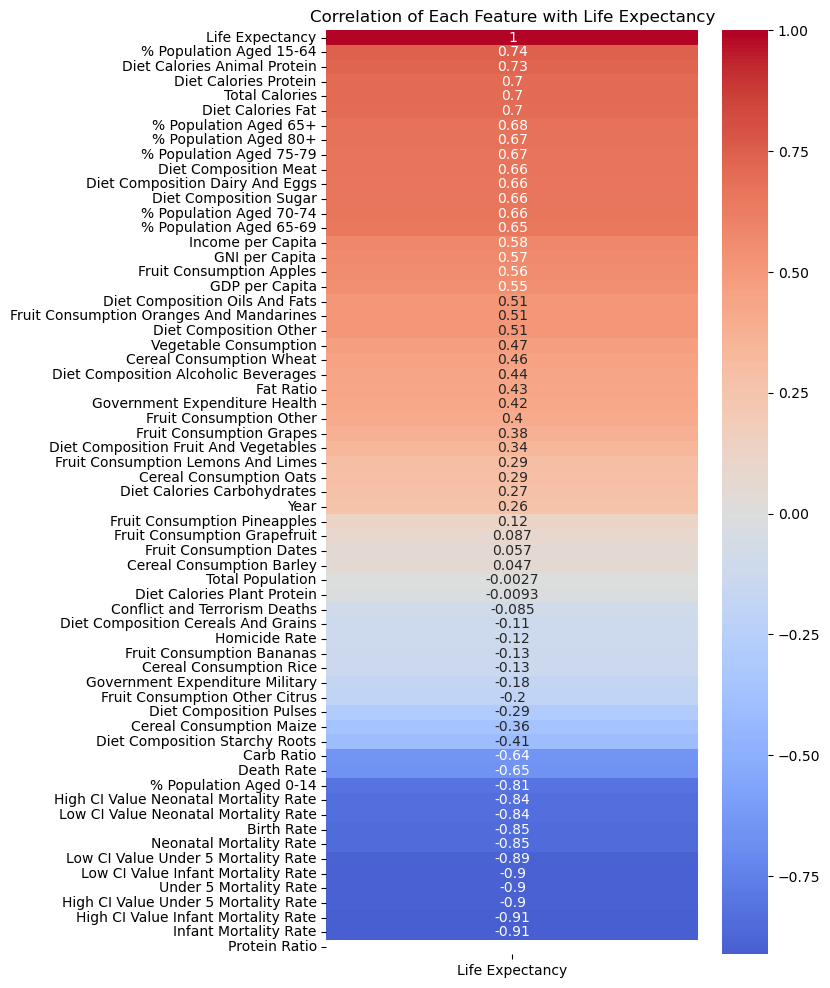

In [22]:
numeric_cols = data.select_dtypes(include=["number"])

corr_with_life = numeric_cols.corr()["Life Expectancy"].sort_values(ascending=False)

plt.figure(figsize=(6, 12))
sns.heatmap(
    corr_with_life.to_frame(),
    annot = True,
    cmap = "coolwarm",
    center = 0
)
plt.title("Correlation of Each Feature with Life Expectancy")
plt.show()

In [ ]:
# Distribution of Life Expectancy by Region

fig = px.box(
    global_data,
    x="Region",
    y="Life Expectancy",
    color="Region",
    title = "Distribution of Life Expectancy by Continent",
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/life_expectancy_box.html"
png_path = "../global_health/web/assets/img/plots/life_expectancy_box.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)

In [ ]:
fig = px.histogram(
    global_data,
    x = "Life Expectancy",
    facet_col = "Gender",
    color = "Gender",
    nbins = 30,
    title = "Distribution of Life Expectancy by Gender"
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/life_expectancy_histogram.html"
png_path = "../global_health/web/assets/img/plots/life_expectancy_histogram.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)


In [ ]:
# Checking for ideally uniform distribution of years

fig = px.histogram(
    global_data,
    x = "Year",
    title = "Distribution of Years"
)

fig.show()

In [ ]:
# Checking for ideally uniform distribution of gender

fig = px.histogram(
    global_data,
    x = "Gender",
    color = "Gender",
    title = "Distribution of Gender"
)

fig.show()

In [27]:
yearly_avg = global_data.groupby(["Year", "Gender"])["Life Expectancy"].mean().reset_index()

fig = px.line(
    yearly_avg,
    x = "Year",
    y = "Life Expectancy",
    color = "Gender",
    title = "Average Life Expectancy Over Time",
    markers = True
)

fig.show()

# Save the interactive HTML and PNG
html_path = "../global_health/web/assets/img/plots/life_expectancy_line.html"
png_path = "../global_health/web/assets/img/plots/life_expectancy_line.png"
plot(fig, filename=html_path, auto_open=False)
fig.write_image(png_path)


Machine Learning

Linear Regression, Random Forest, and XGBoost using Scikit-Learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

# Select only numeric columns
numeric_data = data.select_dtypes(include = ["number"])

X = numeric_data.drop(columns=["Life Expectancy"])
y = numeric_data["Life Expectancy"]

# Drop completely empty columns and then impute missing values
X = X.dropna(axis = 1, how = "all")
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=  X.columns)

# 20 percent of data is used for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

Linear Regression (Multiple)

In [29]:
from sklearn.linear_model import LinearRegression

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Evaluating
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

R²: 0.8204403180856953
RMSE: 4.039187038714324


In [ ]:
# Actual vs Predicted

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

fig = px.scatter(
    results,
    x = "Actual",
    y = "Predicted",
    title = "Linear Regression: Actual vs Predicted Life Expectancy",
    trendline = "ols",
    labels = {"Actual": "Actual Life Expectancy", "Predicted": "Predicted Life Expectancy"}
)

fig.show()

# Save the interactive HTML
html_path = "../global_health/web/assets/img/plots/linear_actual_vs_predicted.html"
plot(fig, filename=html_path, auto_open=False)


'../global_health/web/assets/img/plots/linear_actual_vs_predicted.html'

In [ ]:
residuals = y_test - y_pred

residual_df = pd.DataFrame({
    "Predicted": y_pred,
    "Residuals": residuals
})

fig = px.scatter(
    residual_df,
    x = "Predicted",
    y = "Residuals",
    title = "Linear Regression: Residuals vs Predicted Values",
    labels = {"Predicted": "Predicted Life Expectancy", "Residuals": "Residuals (y - ŷ)"}
)

fig.add_hline(y=0, line_dash="dash", line_color="red")

fig.show()

fig = px.histogram(
    residuals,
    nbins = 40,
    marginal = "rug",
    title = "Linear Regression: Residual Distribution",
    labels = {"value": "Residuals"}
)

fig.show()


Random Forest

In [32]:

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(
    n_estimators = 200,
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 0,
    n_jobs = -1
)

rf.fit(X_train, y_train)

# Evaluating
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

RMSE: 2.6943475436091515
R²: 0.920103431255078


In [ ]:
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

fig = px.bar(
    importance.head(15),
    x = "Importance",
    y = "Feature",
    orientation = "h",
    title = "Random Forest Feature Importance"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Save the interactive HTML
html_path = "../global_health/web/assets/img/plots/random_forest_feature_importance.html"
plot(fig, filename=html_path, auto_open=False)

'../global_health/web/assets/img/plots/random_forest_feature_importance.html'

In [34]:
fig = px.scatter(
    x = y_test,
    y = y_pred,
    labels = {"x": "Actual Life Expectancy", "y": "Predicted Life Expectancy"},
    title = "Random Forest: Actual vs Predicted"
)

fig.add_shape(
    type = "line",
    x0 = y_test.min(), y0 = y_test.min(),
    x1 = y_test.max(), y1 = y_test.max()
)

fig.show()


XGBoost

In [78]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror',
    colsample_bytree = 0.3,
    learning_rate = 0.05,
    max_depth = 10,
    alpha = 10,
    n_estimators = 300,
    random_state = 0
)

xg_reg.fit(X_train, y_train)

# Estimating
y_pred = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

RMSE: 2.5922504551087986
R²: 0.9260437608741365


In [36]:
fig = px.scatter(
    x = y_test,
    y = y_pred,
    labels = {"x": "Actual Life Expectancy", "y": "Predicted Life Expectancy"},
    title = "XGBoost: Actual vs Predicted"
)

fig.add_shape(
    type = "line",
    x0 = y_test.min(), y0 = y_test.min(),
    x1 = y_test.max(), y1 = y_test.max()
)

fig.show()


In [79]:
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xg_reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

fig = px.bar(
    importance.head(20),
    x = "Importance",
    y = "Feature",
    orientation = "h",
    title = "XGBoost Feature Importance"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# Save the interactive HTML
html_path = "../global_health/web/assets/img/plots/xgboost_feature_importance.html"
plot(fig, filename=html_path, auto_open=False)

'../global_health/web/assets/img/plots/xgboost_feature_importance.html'